In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import permutation_test_score

In [24]:
from spotify_data import *

In [25]:
response_variable = "track_genre"

label_encoder = LabelEncoder()
Y = grouped_data[response_variable]
Y = label_encoder.fit_transform(Y)

X = grouped_data.drop(columns=[response_variable, *string_columns])
X = pd.get_dummies(
    X,
    columns=[col for col in categorical_columns if col != response_variable],
    drop_first=True
)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# logistic regression
logreg = LogisticRegression(solver="lbfgs", max_iter=1000)
logreg.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [27]:
# Evaluate the model
Y_pred = logreg.predict(X_test)
Y_pred_proba = logreg.predict_proba(X_test)

report = classification_report(
    Y_test,
    Y_pred,
    target_names=label_encoder.classes_,
)
print(report)

              precision    recall  f1-score   support

   classical       0.37      0.12      0.19       584
  electronic       0.45      0.56      0.50      4041
        folk       0.35      0.19      0.24      1211
     hip-hop       0.00      0.00      0.00       599
        jazz       0.57      0.07      0.12       855
       metal       0.53      0.61      0.57      1218
        misc       0.35      0.51      0.42      6068
         pop       0.31      0.06      0.10      1813
        rock       0.28      0.13      0.17      2150
       world       0.34      0.43      0.38      4261

    accuracy                           0.38     22800
   macro avg       0.35      0.27      0.27     22800
weighted avg       0.37      0.38      0.35     22800



In [29]:
# permutation importance
perm_importance = permutation_test_score(
    logreg,
    X_test,
    Y_test,
    scoring="accuracy",
    cv=5,
    n_permutations=1000,
    n_jobs=-1,
    random_state=42
)
score, permutation_scores, p_value = perm_importance

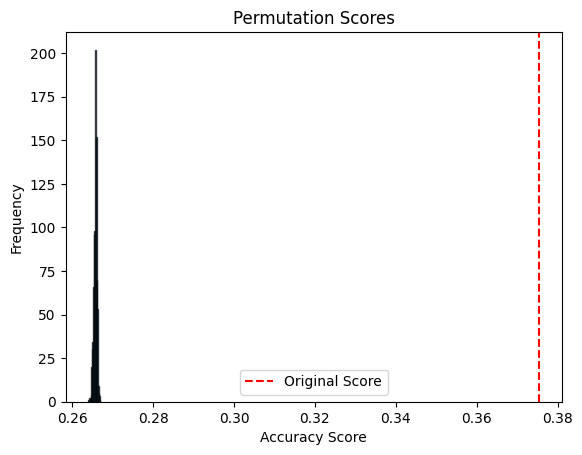

In [30]:
# Plot permutation test scores

plt.hist(permutation_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(score, color='r', linestyle='--', label='Original Score')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Permutation Scores')
plt.legend()
plt.show()